In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.describe(percentiles = [0.3,0.5,0.7])
df.describe(exclude = [int])

,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000
mean,31.992578,0.471876
std,7.884160,0.331329
min,0.000000,0.078000
25%,27.300000,0.243750
50%,32.000000,0.372500
75%,36.600000,0.626250
max,67.100000,2.420000


In [9]:
pd.eval("double_age = df.Age * 2",target = df,inplace = True)
pd.unique(df['Pregnancies'])

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [12]:
df.iloc[1:4,1:4]
df.loc[(df['Age'] > 50)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,double_age
8,2,197,70,45,543,30.5,0.158,53,1,106
9,8,125,96,0,0,0.0,0.232,54,1,108
12,10,139,80,0,0,27.1,1.441,57,0,114
13,1,189,60,23,846,30.1,0.398,59,1,118
14,5,166,72,19,175,25.8,0.587,51,1,102
...,...,...,...,...,...,...,...,...,...,...
719,5,97,76,27,0,35.6,0.378,52,1,104
734,2,105,75,0,0,23.3,0.560,53,0,106
757,0,123,72,0,0,36.3,0.258,52,1,104
759,6,190,92,0,0,35.5,0.278,66,1,132


In [13]:
df.shape

(768, 10)

In [14]:
df.shape[0]

768

In [15]:
df.shape[1]

10

In [17]:
list(df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'double_age']

In [18]:
df2 = df.copy()

In [26]:
df2.isnull().sum()
df2.loc[2:5,'Pregnancies'] = None
df2.loc[6:10,'SkinThickness'] = None
df2.head(11)
df2.tail(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,double_age
760,2.0,88,58,26.0,16,28.4,0.766,22,0,44
761,9.0,170,74,31.0,0,44.0,0.403,43,1,86
762,9.0,89,62,0.0,0,22.5,0.142,33,0,66
763,10.0,101,76,48.0,180,32.9,0.171,63,0,126
764,2.0,122,70,27.0,0,36.8,0.340,27,0,54
765,5.0,121,72,23.0,112,26.2,0.245,30,0,60
766,1.0,126,60,0.0,0,30.1,0.349,47,1,94
767,1.0,93,70,31.0,0,30.4,0.315,23,0,46


In [28]:
df2.isnull().sum()

Pregnancies                 4
Glucose                     0
BloodPressure               0
SkinThickness               5
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
double_age                  0
dtype: int64

In [29]:
df3 = df2.copy()

In [31]:
df3 = df3.dropna()
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,double_age
0,6.0,148,72,35.0,0,33.6,0.627,50,1,100
1,1.0,85,66,29.0,0,26.6,0.351,31,0,62
11,10.0,168,74,0.0,0,38.0,0.537,34,1,68
12,10.0,139,80,0.0,0,27.1,1.441,57,0,114
13,1.0,189,60,23.0,846,30.1,0.398,59,1,118
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0,126
764,2.0,122,70,27.0,0,36.8,0.340,27,0,54
765,5.0,121,72,23.0,112,26.2,0.245,30,0,60
766,1.0,126,60,0.0,0,30.1,0.349,47,1,94


In [35]:
df3 = df2.copy()
mean_value = df3['Pregnancies'].mean()
df3.fillna(mean_value)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,double_age
0,6.000000,148,72,35.0,0,33.6,0.627,50,1,100
1,1.000000,85,66,29.0,0,26.6,0.351,31,0,62
2,3.846859,183,64,0.0,0,23.3,0.672,32,1,64
3,3.846859,89,66,23.0,94,28.1,0.167,21,0,42
4,3.846859,137,40,35.0,168,43.1,2.288,33,1,66
...,...,...,...,...,...,...,...,...,...,...
763,10.000000,101,76,48.0,180,32.9,0.171,63,0,126
764,2.000000,122,70,27.0,0,36.8,0.340,27,0,54
765,5.000000,121,72,23.0,112,26.2,0.245,30,0,60
766,1.000000,126,60,0.0,0,30.1,0.349,47,1,94


In [37]:
df3 = df2.copy()
median_value = df3['Pregnancies'].median()
df3.fillna(median_value)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,double_age
0,6.0,148,72,35.0,0,33.6,0.627,50,1,100
1,1.0,85,66,29.0,0,26.6,0.351,31,0,62
2,3.0,183,64,0.0,0,23.3,0.672,32,1,64
3,3.0,89,66,23.0,94,28.1,0.167,21,0,42
4,3.0,137,40,35.0,168,43.1,2.288,33,1,66
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0,126
764,2.0,122,70,27.0,0,36.8,0.340,27,0,54
765,5.0,121,72,23.0,112,26.2,0.245,30,0,60
766,1.0,126,60,0.0,0,30.1,0.349,47,1,94


In [41]:
df3 = df2.copy()
mode_value = df3['Pregnancies'].mode()[0]
df3.fillna(mode_value)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,double_age
0,6.0,148,72,35.0,0,33.6,0.627,50,1,100
1,1.0,85,66,29.0,0,26.6,0.351,31,0,62
2,1.0,183,64,0.0,0,23.3,0.672,32,1,64
3,1.0,89,66,23.0,94,28.1,0.167,21,0,42
4,1.0,137,40,35.0,168,43.1,2.288,33,1,66
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0,126
764,2.0,122,70,27.0,0,36.8,0.340,27,0,54
765,5.0,121,72,23.0,112,26.2,0.245,30,0,60
766,1.0,126,60,0.0,0,30.1,0.349,47,1,94


In [42]:
df[df.index.isin(range(2,10))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,double_age
2,8,183,64,0,0,23.3,0.672,32,1,64
3,1,89,66,23,94,28.1,0.167,21,0,42
4,0,137,40,35,168,43.1,2.288,33,1,66
5,5,116,74,0,0,25.6,0.201,30,0,60
6,3,78,50,32,88,31.0,0.248,26,1,52
7,10,115,0,0,0,35.3,0.134,29,0,58
8,2,197,70,45,543,30.5,0.158,53,1,106
9,8,125,96,0,0,0.0,0.232,54,1,108


In [43]:
df1 = pd.DataFrame([['a',1],['b',2]],columns = ['letters','number'])

In [44]:
df2 = pd.DataFrame([['d',1],['c',2],['m',6]],columns = ['letters','number'])

In [46]:
pd.concat([df1,df2],ignore_index = True)

,letters,number
0,a,1
1,b,2
2,d,1
3,c,2
4,m,6


In [64]:
df1 = pd.DataFrame({'names':['ram','amit','aman','shiv','om'],
                    'value':[1,2,3,4,5]})
df2 = pd.DataFrame({'stream':['ram','amit','aman','shiv','om'],
                    'value':[71,62,33,74,85]})

In [65]:
df1.merge(df2,left_on = 'names',right_on = 'stream',suffixes = ('_rollno','_marks'))

,names,value_rollno,stream,value_marks
0,ram,1,ram,71
1,amit,2,amit,62
2,aman,3,aman,33
3,shiv,4,shiv,74
4,om,5,om,85


In [57]:
df1

,names,value
0,ram,1
1,amit,2
2,aman,3
3,shiv,4
4,om,5


In [58]:
df2

,stream,value
0,PCB,71
1,PCM,62
2,PCBM,33
3,PCM,74
4,PCB,85


In [67]:
indices = np.where(df['Pregnancies'] > 13)
indices

(array([ 88, 159, 298, 455], dtype=int64),)

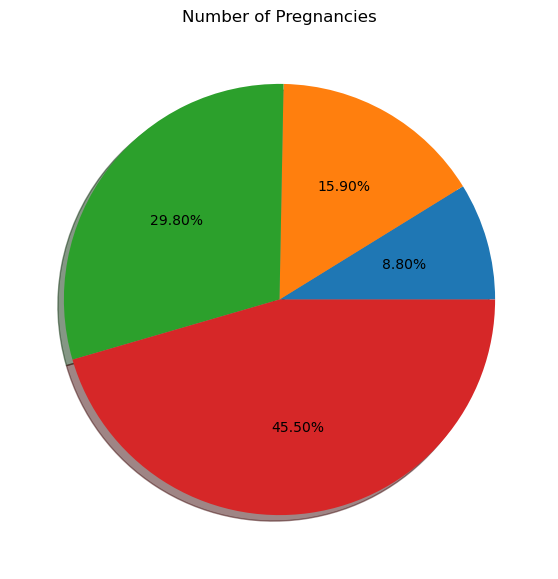

In [74]:
plt.figure(figsize = (7,7))
plt.pie(indices[0],autopct = '%1.2f%%',shadow = True)
plt.title("Number of Pregnancies")
plt.show()